In [1]:
from cdalvaro.catalogues import OpenClust
from cdalvaro.data_base import DB
import cdalvaro.graphics
from cdalvaro.logging import Logger
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logger = Logger.instance()
logger.setLevel(logging.ERROR)

db = DB.instance(host='ai.cdalvaro.io', port=15432)
cdalvaro.graphics.set_color_palette()

In [3]:
openclust_df = OpenClust.catalogue(as_dataframe=True)

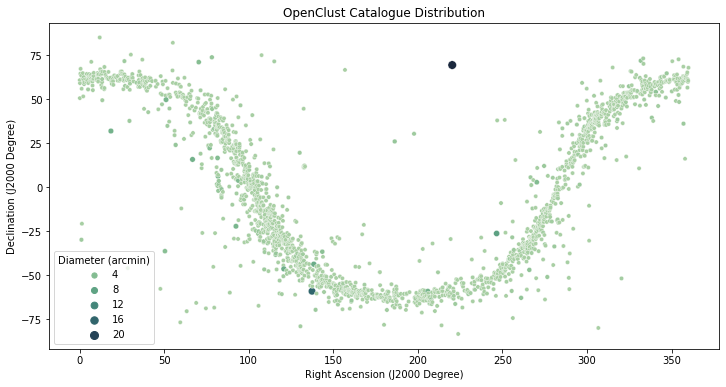

In [4]:
f, ax = plt.subplots(figsize=(12, 6))
ax.set_title('OpenClust Catalogue Distribution')
ax.set_xlabel('Right Ascension (J2000 Degree)')
ax.set_ylabel('Declination (J2000 Degree)')
sns.scatterplot(x="ra", y="dec", hue="diam", size="diam", data=openclust_df, palette="ch:r=-.5,l=.75", ax=ax);
plt.legend().set_title("Diameter (arcmin)")

In [5]:
cluster_name = 'NGC 2353'
clusters = OpenClust.get_clusters(names={cluster_name})

In [6]:
df = db.get_stars(region=clusters[cluster_name])

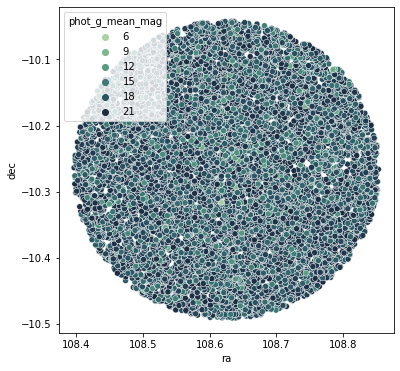

In [7]:
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x="ra", y="dec", hue="phot_g_mean_mag", palette="ch:r=-.5,l=.75", data=df, ax=ax);